In [2]:
import numpy as np
import pynbody
import matplotlib.pyplot as plt
from matplotlib import cm
from pynbody.halo.rockstar import RockstarCatalogueOneCpu
from astropy.cosmology import FlatLambdaCDM
from astropy.io import ascii
from astropy import units as u
import astropy.coordinates as coord
from matplotlib.colors import LogNorm
import scipy.ndimage

In [3]:
cosmo = FlatLambdaCDM(H0=100, Om0=0.315)


def spherical2cartesian(ra,dec,redshift):
    distance = cosmo.comoving_distance(redshift) 
    coords_spherical = coord.SkyCoord(ra*u.degree,dec*u.degree,distance=distance)
    coords_cartesian = coords_spherical.cartesian
    return (coords_cartesian.x,coords_cartesian.y,coords_cartesian.z)


def cartesian2spherical(x,y,z):
    coords_cartesian = coord.CartesianRepresentation(x*u.Mpc,y*u.Mpc,z*u.Mpc)
    coords_spherical = coord.SkyCoord(coords_cartesian.represent_as(coord.SphericalRepresentation))
    #ra = ((coords_spherical.ra.value-180)%360-180)*u.deg #optional
    def z_from_dist(distance):
      dummyred = np.linspace(0.,10.,10000)
      dummydist = cosmo.comoving_distance(dummyred)
      res = np.interp(distance,dummydist,dummyred)
      return (res)
    redshift = z_from_dist(coords_spherical.distance)
    return (coords_spherical.ra,coords_spherical.dec,redshift)


In [4]:
#sim stuff
box_size = 512.
box_res = 256.

#Do general cosmo things
cosmo = FlatLambdaCDM(H0=100, Om0=0.315)
mass_res = cosmo.critical_density0.to(u.M_sun/u.Mpc**3)*(box_size*u.Mpc)**3/box_res**3*cosmo.Om(0.)

#get speed of light in km/s
ckms = 299792
velkms = (box_size/8677.2079486362706)*ckms

In [5]:
def get_z_rockstar(h):
    z = round(1./h._head[0][3] -1,2)
    z = format(z, '.2f')
    return z

In [6]:
def read_pynbody(path_s,path_h):
    s = pynbody.load(path_s)
    s['pos'] = (s['pos']+0.5)*box_size
    s['pos'].units='Mpc'
    s['vel']*=velkms
    s['vel'].units='km s^-1'
    s['mass'] = mass_res.value
    s['mass'].units='Msol'
    h = RockstarCatalogueOneCpu(s,filename=path_h)

    return (s,h)

In [7]:
s5,h5 = read_pynbody("/work/metin/pkdgrav/central_512_256_130/constrained_birth_central_512_256_130.00005","/work/metin/rockstar/central/cosmos_512_256_130/halos_00005.0.bin")

In [8]:
s30,h30 = read_pynbody("/work/metin/pkdgrav/central_512_256_130/constrained_birth_central_512_256_130.00030","/work/metin/rockstar/central/cosmos_512_256_130/halos_00030.0.bin")

In [11]:
#1id 2num_p 3mvir 4mbound_vir 5rvir 6vmax 7rvmax 8vrms 9x 10y 11z 12vx 13vy 14vz 15Jx 16Jy 17Jz 18E 19Spin 20PosUncertainty 21VelUncertainty 22bulk_vx 23bulk_vy 24bulk_vz 25BulkVelUnc 26n_core 27m200b 28m200c 29m500c 30m2500c 31Xoff 32Voff 33spin_bullock 34b_to_a 35c_to_a 36A[x] 37A[y] 38A[z] 39b_to_a(500c) 40c_to_a(500c) 41A[x](500c) 42A[y](500c) 43A[z](500c) 44Rs 45Rs_Klypin 46T/|U| 47M_pe_Behroozi 48M_pe_Diemer 49Halfmass_Radius 50idx 51i_so 52i_ph 53num_cp 54mmetric

tbl5 = ascii.read("/work/metin/rockstar/central/cosmos_512_256_130/halos_00005.0.ascii")
tbl30 = ascii.read("/work/metin/rockstar/central/cosmos_512_256_130/halos_00030.0.ascii")

a30 = np.asarray(np.argsort(tbl30['col3']))


In [43]:
len(h30[0])

51

In [44]:
h30._get_particles_for_halo(0)

array([14743718, 14743720, 14743721, 14743722, 14743724, 14743726,
       14743727, 14743728, 14743729, 14743732, 14743733, 14743734,
       14743739, 14743789, 14743801, 14743803, 14743804, 14743805,
       14743808, 14743810, 14743817, 14743850, 14743854, 14744140,
       14744143, 14744147, 14744152, 14744155, 14744156, 14744157,
       14744167, 14744168, 14744247, 14744251, 14746408, 14746410,
       14746411, 14746412, 14746413, 14746414, 14746415, 14746416,
       14746418, 14746420, 14746422, 14746425, 14746427, 14746461,
       14746462, 14746463, 14746543])

In [8]:
s5.properties

{'time': Unit("2.63e-06 kpc**3/2 Msol**-1/2 G**-1/2")}

In [9]:
s5.loadable_keys()

['mass', 'pos', 'eps', 'vel', 'phi']

In [10]:
s5['pos']

SimArray([[2.33605957e+00, 7.49664307e-01, 4.41467285e-01],
          [5.95169067e-01, 2.49031067e+00, 1.94770813e+00],
          [2.68356323e+00, 1.81750488e+00, 2.33314514e+00],
          ...,
          [5.11646942e+02, 5.11405609e+02, 5.10059708e+02],
          [5.10950348e+02, 5.11306488e+02, 5.09028458e+02],
          [5.11984009e+02, 5.08568375e+02, 5.11896622e+02]], 'Mpc')

In [11]:
s5.physical_units()

In [12]:
s5.keys()

['pos', 'x', 'y', 'z', 'vel', 'vx', 'vy', 'vz', 'mass', 'eps', 'phi']

In [13]:
h5[0]['mass'].sum().in_units('Msol')

SimArray(1.55265091e+14, 'Msol')

In [14]:
h5[0].properties['m']

6993500000000.0

In [15]:
mass_res

<Quantity 6.99392301e+11 solMass>

In [38]:
#dir(h5[0])
#dir(h5)

In [36]:
h5._get_particles_for_halo(0)

array([14728395, 14728404, 14728876, 14728880, 14728884, 14728889,
       14743871, 14743877, 14743899, 14744105, 14744106, 14744109,
       14744110, 14744111, 14744112, 14744113, 14744114, 14744115,
       14744116, 14744117, 14744143, 14744145, 14744148, 14744152,
       14744153, 14744155, 14744156, 14744159, 14744160, 14744162,
       14744163, 14744164, 14744750, 14744751, 14744752, 14744753,
       14744754, 14744755, 14744756, 14744757, 14744758, 14744759,
       14744760, 14744761, 14744762, 14744763, 14744764, 14744765,
       14744766, 14744767, 14744768, 14744769, 14744770, 14744771,
       14744772, 14744773, 14744774, 14744775, 14744776, 14744777,
       14744778, 14744779, 14744780, 14744781, 14744782, 14744783,
       14744784, 14744785, 14744786, 14744787, 14744788, 14744789,
       14744790, 14744791, 14744792, 14744795, 14744796, 14744797,
       14744798, 14744799, 14744800, 14744801, 14744802, 14744803,
       14744804, 14744805, 14744806, 14744807, 14744808, 14744

In [190]:
h30._get_particles_for_halo(0)

array([14743718, 14743720, 14743721, 14743722, 14743724, 14743726,
       14743727, 14743728, 14743729, 14743732, 14743733, 14743734,
       14743739, 14743789, 14743801, 14743803, 14743804, 14743805,
       14743808, 14743810, 14743817, 14743850, 14743854, 14744140,
       14744143, 14744147, 14744152, 14744155, 14744156, 14744157,
       14744167, 14744168, 14744247, 14744251, 14746408, 14746410,
       14746411, 14746412, 14746413, 14746414, 14746415, 14746416,
       14746418, 14746420, 14746422, 14746425, 14746427, 14746461,
       14746462, 14746463, 14746543])

In [24]:
nc = 256
H5, edges = np.histogramdd(s5['pos'], bins = nc)
H5 = H5/H5.mean() -1.
b5 = H5.reshape((nc,nc,nc))

H30, edges = np.histogramdd(s30['pos'], bins = nc)
H30 = H30/H30.mean() -1.
b30 = H30.reshape((nc,nc,nc))


In [59]:
start = 126
num_slices = 4
end = start+num_slices


x_h = tbl30["col10"]
y_h = tbl30["col11"]
z_h = tbl30["col9"]

side = 512.
dy = side/nc
edge = 0
start_gal = edge + start*dy
end_gal = edge + end*dy
i_h = np.where((z_h>start_gal)*(z_h<end_gal))[0]

In [74]:
a = np.asarray(np.argsort(tbl30['col3'][i_h]))
tbl30['col1'][a][-10:][::-1]

3
11
15
34
38
51
25
43
62
68


In [78]:
b = s30.bridge(s5)
progenitor_particles = b(h30[3])
progenitor_particles['x']

SimArray([237.11617088, 241.78081131, 245.18083763, 241.96720314,
          241.52680874, 245.56690311, 242.40927601, 242.57374859,
          244.36501026, 249.81258392, 249.91875601, 249.96233034,
          247.71261787, 247.39468479, 246.0412941 , 254.85007632,
          252.25119758, 262.66441059, 257.1256423 , 257.21887028,
          258.37038493, 258.14361644, 257.68092346, 257.59810996,
          263.43478823, 263.78566217, 263.29282475, 261.01944256], 'Mpc')

In [26]:
cmap = plt.get_cmap('bone_r')

In [27]:
c5=b5[start:end,:,:].mean(axis=0)
c5 = scipy.ndimage.interpolation.zoom(c5 ,order=1, zoom=2)

c30=b30[start:end,:,:].mean(axis=0)
c30 = scipy.ndimage.interpolation.zoom(c30 ,order=1, zoom=2)

(175.0, 325.0)

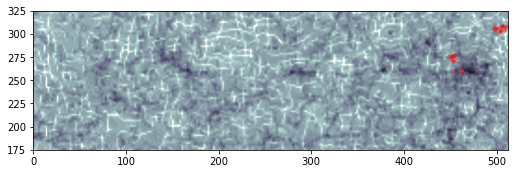

In [83]:
fig = plt.figure(figsize=(8.5, 5.5))
ax = fig.add_subplot(111)
im = plt.imshow((c5+1).T,norm=LogNorm(vmin=0.1,vmax=40),interpolation='bilinear',origin='lower', aspect='auto',extent = [0.,512,0,512], cmap=cmap)
#plt.scatter(h5[0]['y'].in_units("Mpc"),h5[0]['z'].in_units("Mpc"),s=10,color='r',alpha=0.1)
#plt.scatter(h5[1]['y'].in_units("Mpc"),h5[1]['z'].in_units("Mpc"),s=10,color='r',alpha=0.1)
#plt.scatter(h5[2]['y'].in_units("Mpc"),h5[2]['z'].in_units("Mpc"),s=10,color='r',alpha=0.1)
plt.scatter(progenitor_particles['y'],progenitor_particles['z'],s=10,color='r',alpha=0.3)
ax.set_aspect('equal')
plt.ylim([175,325])

(175.0, 325.0)

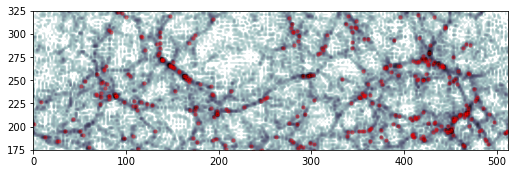

In [85]:
fig = plt.figure(figsize=(8.5, 5.5))
ax = fig.add_subplot(111)
im = plt.imshow((c30+1).T,norm=LogNorm(vmin=0.1,vmax=40),interpolation='bilinear',origin='lower', aspect='auto',extent = [0.,512,0,512], cmap=cmap)
plt.scatter(x_h[i_h],y_h[i_h],s=10,color='r',alpha=0.3)


ax.set_aspect('equal')
plt.ylim([175,325])

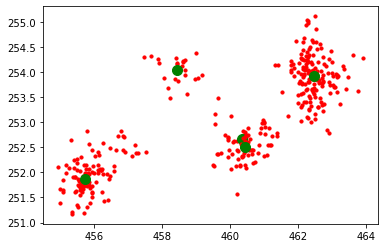

In [86]:
plt.scatter(h30[0]['y'].in_units("Mpc"),h30[0]['z'].in_units("Mpc"),s=10,color='r')
plt.scatter(h30[0].properties["pos"][1],h30[0].properties["pos"][2],s=100,color='g')

plt.scatter(h30[1]['y'].in_units("Mpc"),h30[1]['z'].in_units("Mpc"),s=10,color='r')
plt.scatter(h30[1].properties["pos"][1],h30[1].properties["pos"][2],s=100,color='g')

plt.scatter(h30[2]['y'].in_units("Mpc"),h30[2]['z'].in_units("Mpc"),s=10,color='r')
plt.scatter(h30[2].properties["pos"][1],h30[2].properties["pos"][2],s=100,color='g')

plt.scatter(h30[3]['y'].in_units("Mpc"),h30[3]['z'].in_units("Mpc"),s=10,color='r')
plt.scatter(h30[3].properties["pos"][1],h30[3].properties["pos"][2],s=100,color='g')

plt.scatter(h30[4]['y'].in_units("Mpc"),h30[4]['z'].in_units("Mpc"),s=10,color='r')
plt.scatter(h30[4].properties["pos"][1],h30[4].properties["pos"][2],s=100,color='g')

In [87]:
import ytree

In [88]:
a = ytree.load("/work/metin/rockstar/central/cosmos_512_256_130/trees/tree_0_0_0.dat")

Performance will be improved by saving this arbor with "save_arbor" and reloading:
	>>> a = ytree.load("/work/metin/rockstar/central/cosmos_512_256_130/trees/tree_0_0_0.dat")
	>>> fn = a.save_arbor()
	>>> a = ytree.load(fn)


In [89]:
print (a.box_size)

512.0 Mpc/h


In [90]:
print (a.hubble_constant, a.omega_matter, a.omega_lambda)

0.677 0.315 0.685


In [91]:
print (a.field_list)

['scale', 'id', 'desc_scale', 'desc_id', 'num_prog', 'pid', 'upid', 'desc_pid', 'phantom', 'sam_mvir', 'mvir', 'rvir', 'rs', 'vrms', 'mmp?', 'scale_of_last_MM', 'vmax', 'x', 'y', 'z', 'vx', 'vy', 'vz', 'Jx', 'Jy', 'Jz', 'Spin', 'Breadth_first_ID', 'Depth_first_ID', 'Tree_root_ID', 'Orig_halo_ID', 'Snap_num', 'Next_coprogenitor_depthfirst_ID', 'Last_progenitor_depthfirst_ID', 'Rs_Klypin', 'Mvir_all', 'M200b', 'M200c', 'M500c', 'M2500c', 'Xoff', 'Voff', 'Spin_Bullock', 'b_to_a', 'c_to_a', 'A[x]', 'A[y]', 'A[z]', 'b_to_a(500c)', 'c_to_a(500c)', 'A[x](500c)', 'A[y](500c)', 'A[z](500c)', 'T/|U|', 'M_pe_Behroozi', 'M_pe_Diemer', 'Halfmass_Radius']


In [92]:
print (a.size)

Loading tree roots: 100%|██████████| 469189458/469189458 [00:01<00:00, 292808157.71it/s]
59960


In [93]:
print (a["Mvir_all"])

Reading root fields: 100%|██████████| 59960/59960 [00:01<00:00, 37509.08it/s]
[5.6570e+15 1.7568e+15 1.3952e+15 ... 1.3987e+12 1.3987e+12 1.3987e+12] Msun/h


In [94]:
print (a["rvir"].to("Mpc/h"))

Reading root fields: 100%|██████████| 59960/59960 [00:02<00:00, 25828.36it/s]
[3.612985 2.446664 2.265768 ... 0.226766 0.226766 0.226766] Mpc/h


In [95]:
print (a[0])

TreeNode[1093844]


In [96]:
a['id']

Reading root fields: 100%|██████████| 59960/59960 [00:01<00:00, 47080.18it/s]


array([1093844., 1093900., 1093881., ..., 1155310., 1155855., 1156194.])

In [97]:
my_tree = a[0]

In [98]:
print (my_tree["Mvir_all"])

5657000000000000.0 Msun/h


In [117]:
for my_node in my_tree["tree"][0:10]:
     print (my_node,'Tree_root_ID:', my_node['Tree_root_ID'], 'Orig_halo_ID:',my_node['Orig_halo_ID'] ,'Snap_num:' , my_node['Snap_num'] , "mass = ",my_node["mvir"]/1E15,"x1E15" ,"z=",np.round(my_node["redshift"],2))

TreeNode[1093844] Tree_root_ID: 1093844.0 Orig_halo_ID: 21.0 Snap_num: 26.0 mass =  5.657 Msun/h x1E15 z= 0.0
TreeNode[1029502] Tree_root_ID: 1093844.0 Orig_halo_ID: 19.0 Snap_num: 25.0 mass =  5.866 Msun/h x1E15 z= 0.03
TreeNode[963898] Tree_root_ID: 1093844.0 Orig_halo_ID: 2.0 Snap_num: 24.0 mass =  5.998 Msun/h x1E15 z= 0.07
TreeNode[899717] Tree_root_ID: 1093844.0 Orig_halo_ID: 15.0 Snap_num: 23.0 mass =  5.89 Msun/h x1E15 z= 0.1
TreeNode[836888] Tree_root_ID: 1093844.0 Orig_halo_ID: 26.0 Snap_num: 22.0 mass =  5.85 Msun/h x1E15 z= 0.14
TreeNode[775281] Tree_root_ID: 1093844.0 Orig_halo_ID: 25.0 Snap_num: 21.0 mass =  5.688 Msun/h x1E15 z= 0.18
TreeNode[714896] Tree_root_ID: 1093844.0 Orig_halo_ID: 21.0 Snap_num: 20.0 mass =  5.285 Msun/h x1E15 z= 0.22
TreeNode[655772] Tree_root_ID: 1093844.0 Orig_halo_ID: 8.0 Snap_num: 19.0 mass =  4.527 Msun/h x1E15 z= 0.27
TreeNode[597970] Tree_root_ID: 1093844.0 Orig_halo_ID: 19.0 Snap_num: 18.0 mass =  4.181 Msun/h x1E15 z= 0.31
TreeNode[54173

In [100]:
my_ancestors = list(my_tree.ancestors)


In [101]:
print (my_ancestors)

[TreeNode[1029502], TreeNode[1029503]]


In [102]:
print (my_ancestors[1].descendent)

TreeNode[1093844]


In [103]:
my_tree

TreeNode[1093844]

In [104]:
a.add_alias_field("mass", "Mvir_all", units="Msun/h")

In [105]:
print (list(my_tree["prog"]))

[TreeNode[1093844], TreeNode[1029502], TreeNode[963898], TreeNode[899717], TreeNode[836888], TreeNode[775281], TreeNode[714896], TreeNode[655772], TreeNode[597970], TreeNode[541734], TreeNode[486989], TreeNode[434050], TreeNode[383084], TreeNode[334417], TreeNode[287990], TreeNode[244105], TreeNode[202993], TreeNode[165296], TreeNode[131166], TreeNode[100551], TreeNode[73867], TreeNode[51387], TreeNode[33236], TreeNode[19430], TreeNode[9492], TreeNode[3255], TreeNode[2728]]


In [116]:
for my_node in my_tree["prog"]:
     print (my_node,'Tree_root_ID:', my_node['Tree_root_ID'], 'Orig_halo_ID:',my_node['Orig_halo_ID'] ,'Snap_num:' , my_node['Snap_num'] ,"mass = ",my_node["Mvir_all"]/1E15,"x1E15" ,"z=",np.round(my_node["redshift"],2))

TreeNode[1093844] Tree_root_ID: 1093844.0 Orig_halo_ID: 21.0 Snap_num: 26.0 mass =  5.657 Msun/h x1E15 z= 0.0
TreeNode[1029502] Tree_root_ID: 1093844.0 Orig_halo_ID: 19.0 Snap_num: 25.0 mass =  5.8661 Msun/h x1E15 z= 0.03
TreeNode[963898] Tree_root_ID: 1093844.0 Orig_halo_ID: 2.0 Snap_num: 24.0 mass =  6.0074 Msun/h x1E15 z= 0.07
TreeNode[899717] Tree_root_ID: 1093844.0 Orig_halo_ID: 15.0 Snap_num: 23.0 mass =  5.8976 Msun/h x1E15 z= 0.1
TreeNode[836888] Tree_root_ID: 1093844.0 Orig_halo_ID: 26.0 Snap_num: 22.0 mass =  5.8557 Msun/h x1E15 z= 0.14
TreeNode[775281] Tree_root_ID: 1093844.0 Orig_halo_ID: 25.0 Snap_num: 21.0 mass =  5.6878 Msun/h x1E15 z= 0.18
TreeNode[714896] Tree_root_ID: 1093844.0 Orig_halo_ID: 21.0 Snap_num: 20.0 mass =  5.285 Msun/h x1E15 z= 0.22
TreeNode[655772] Tree_root_ID: 1093844.0 Orig_halo_ID: 8.0 Snap_num: 19.0 mass =  4.5269 Msun/h x1E15 z= 0.27
TreeNode[597970] Tree_root_ID: 1093844.0 Orig_halo_ID: 19.0 Snap_num: 18.0 mass =  4.1814 Msun/h x1E15 z= 0.31
TreeN

In [107]:
print (my_tree["prog", "mass"])

[5.6570e+15 5.8661e+15 6.0074e+15 5.8976e+15 5.8557e+15 5.6878e+15
 5.2850e+15 4.5269e+15 4.1814e+15 3.6198e+15 2.6303e+15 2.2337e+15
 2.0967e+15 2.0197e+15 1.9211e+15 1.7959e+15 1.6910e+15 1.5721e+15
 1.4015e+15 1.2427e+15 9.9727e+14 8.2453e+14 5.7766e+14 2.1610e+14
 7.2033e+13 2.4477e+13 1.1190e+13] Msun/h


In [107]:
tree_nodes = list(my_tree["tree"])

In [126]:
tree_nodes[0]

TreeNode[1093844]

In [128]:
tree_nodes[0].uid

1093844

In [129]:
print (a.box_size)

512.0 Mpc/h


In [130]:
print (a.box_size.to("Mpccm/h"))

512.0 Mpccm/h


In [131]:
halos = a.select_halos('tree["tree", "mass"] > 1E15',
...                        fields=["mass"])

Selecting halos: 100%|██████████| 59960/59960 [00:20<00:00, 2969.16it/s]


In [146]:
for i in halos:
    print (i['x'].value,i["redshift"])

248.70842 0.0
248.83076 0.03241792277513933
249.02083 0.06643915964594216
249.16916 0.10217127741651044
249.38989 0.13999088007295946
249.57013 0.1798017932987257
249.73924 0.2218963831867058
250.03407 0.266624445851805
250.41301 0.3144058885383807
250.76157 0.36537411250682683
251.04086 0.4198494959534289
251.2841 0.4788524105294292
251.48193 0.5422578655151142
251.63535 0.6116035455277999
251.8746 0.6871941960519656
252.20735 0.7702248185519562
252.56055 0.8625442354255912
252.89084 0.9654088050314464
253.20998 1.0815986677768525
253.5459 1.2143489813994686
248.98094 0.06643915964594216
250.2482 0.266624445851805
250.92395 0.4198494959534289
336.11539 0.0
336.22696 0.03241792277513933
336.36176 0.06643915964594216
336.55215 0.10217127741651044
336.79352 0.13999088007295946
337.01675 0.1798017932987257
337.16547 0.2218963831867058
121.38422 0.0
121.25722 0.03241792277513933
121.1478 0.06643915964594216
121.00691 0.10217127741651044
120.59692 0.13999088007295946
120.45181 0.17980179329

In [165]:
p = ytree.TreePlot(a[0], dot_kwargs={'rankdir': 'LR', 'size': '"12,4"'})

In [173]:
p.min_mass_ratio = 0.001

In [174]:
p.save("tree.png")

'tree.png'

In [182]:
h30[0].properties["pos"]

array([248.71356, 460.35657, 252.6606 ], dtype=float32)

In [209]:
h30[0].properties

{'time': Unit("1.00e-05 kpc**3/2 Msol**-1/2 G**-1/2"),
 'halo_id': 0,
 'id': 0,
 'pos': array([248.71356, 460.35657, 252.6606 ], dtype=float32),
 'vel': array([ -635.6196 , -1576.25   ,  -183.60661], dtype=float32),
 'corevel': array([ -635.6196 , -1576.25   ,  -183.60661], dtype=float32),
 'bulkvel': array([ -635.6196 , -1576.25   ,  -183.60661], dtype=float32),
 'm': 11189600000000.0,
 'r': 400.28137,
 'child_r': 0.66745895,
 'vmax_r': 0.4968579,
 'mgrav': 7692850000000.0,
 'vmax': 332.288,
 'rvmax': 299.6715,
 'rs': 48.763885,
 'klypin_rs': 48.763885,
 'vrms': 353.96127,
 'J': array([-1.2129445e+14,  1.3399858e+14,  8.0821956e+13], dtype=float32),
 'energy': 8.612842e+16,
 'spin': 0.0823022,
 'alt_m': array([1.11896e+13, 7.69285e+12, 0.00000e+00, 0.00000e+00], dtype=float32),
 'Xoff': 84.884,
 'Voff': 16.844744,
 'b_to_a': 0.6017119,
 'c_to_a': 0.29872715,
 'A': array([-14.1418295, 154.57191  , 109.92995  ], dtype=float32),
 'b_to_a2': 0.0,
 'c_to_a2': 0.0,
 'A2': array([0., 0., 0.]